In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('NBA Player Statistics-2022.csv')

# Preview data
print(df.head())

                  Player Pos Team  GP  GS    MIN    PTS  AST  STL  BLK  ...  \
0           Jayson Tatum  PF  BOS  74  74  2,732  2,225  342   78   51  ...   
1            Joel Embiid   C  PHI  66  66  2,284  2,183  274   66  112  ...   
2  Giannis Antetokounmpo  PF  MIL  63  63  2,023  1,959  359   52   51  ...   
3          Julius Randle  PF  NYK  77  77  2,737  1,936  316   49   21  ...   
4          DeMar DeRozan  SF  CHI  74  74  2,681  1,816  377   83   36  ...   

   REB  OREB  DREB  FGM   FG%  3PTM   FT%  FTM      Cash2023 Age  
0  649    78   571  727  46.6   240  35.0  531  $32,600,060   24  
1  670   113   557  728  54.8    66  33.0  661  $47,607,350   28  
2  742   137   605  707  55.3    47  27.5  498  $45,640,084   28  
3  767   141   626  658  45.9   218  34.3  402  $25,660,800   28  
4  343    34   309  657  50.4    46  32.4  456  $28,600,000   33  

[5 rows x 21 columns]


In [10]:
df.head()

,Player,Pos,Team,GP,GS,MIN,PTS,AST,STL,BLK,...,REB,OREB,DREB,FGM,FG%,3PTM,FT%,FTM,Cash2023,Age
0,Jayson Tatum,PF,BOS,74,74,"2,732","2,225",342,78,51,...,649,78,571,727,46.6,240,35.0,531,"$32,600,060",24
1,Joel Embiid,C,PHI,66,66,"2,284","2,183",274,66,112,...,670,113,557,728,54.8,66,33.0,661,"$47,607,350",28
2,Giannis Antetokounmpo,PF,MIL,63,63,"2,023","1,959",359,52,51,...,742,137,605,707,55.3,47,27.5,498,"$45,640,084",28
3,Julius Randle,PF,NYK,77,77,"2,737","1,936",316,49,21,...,767,141,626,658,45.9,218,34.3,402,"$25,660,800",28
4,DeMar DeRozan,SF,CHI,74,74,"2,681","1,816",377,83,36,...,343,34,309,657,50.4,46,32.4,456,"$28,600,000",33


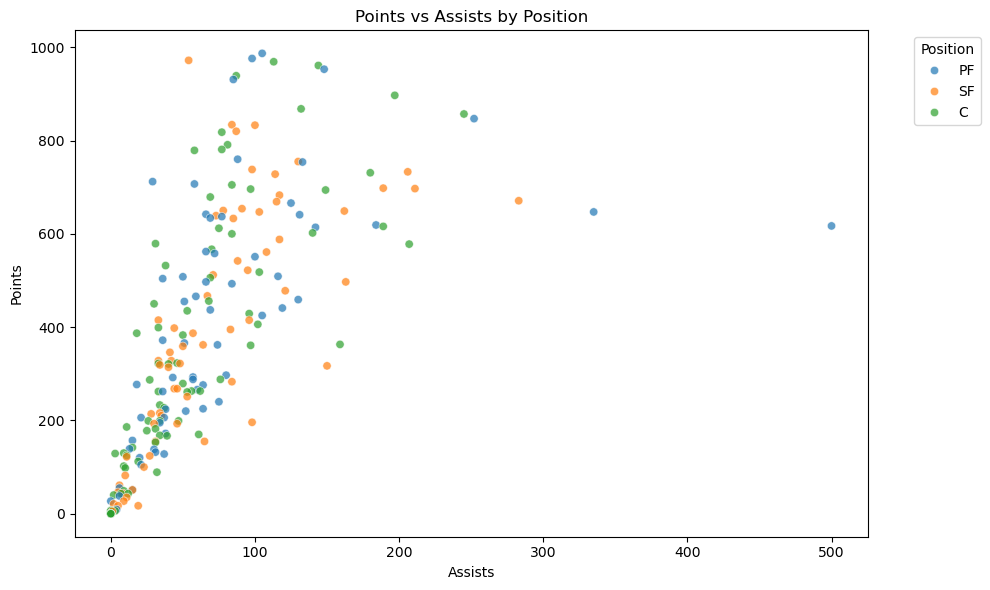

In [12]:
# Drop rows with missing PTS or AST
scatter_df = df[['PTS', 'AST', 'Pos']].dropna()

# Ensure numeric types
scatter_df['PTS'] = pd.to_numeric(scatter_df['PTS'], errors='coerce')
scatter_df['AST'] = pd.to_numeric(scatter_df['AST'], errors='coerce')

# Drop any new NaNs after conversion
scatter_df = scatter_df.dropna()

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=scatter_df, x='AST', y='PTS', hue='Pos', alpha=0.7)
plt.title('Points vs Assists by Position')
plt.xlabel('Assists')
plt.ylabel('Points')
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

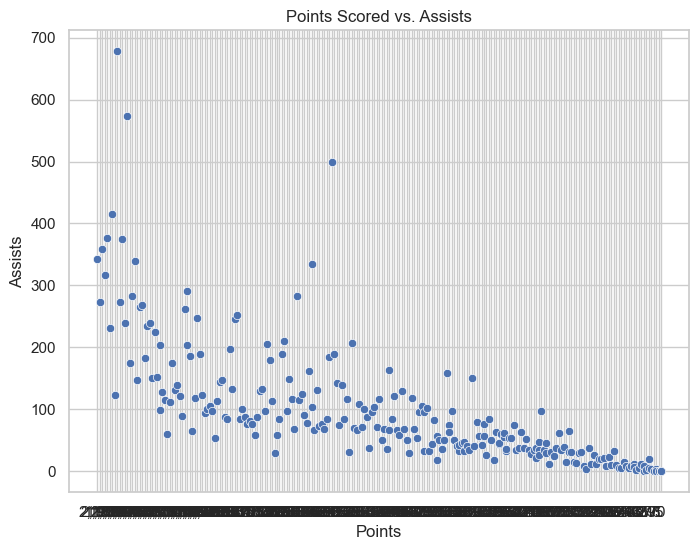

In [138]:
# --- Bivariate Visualizations ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PTS', y='AST', data=df)
plt.title('Points Scored vs. Assists')
plt.xlabel('Points')
plt.ylabel('Assists')
plt.show()

In [130]:
box_df = df[['PTS','Pos']].dropna()

In [134]:
box_df['PTS',]=pd.to_numeric(box_df['PTS'],errors='coerce')
box_df=box_df.dropna()

In [96]:
order=box_df.groupby('Pos')['PTS'].median().sort_values().index

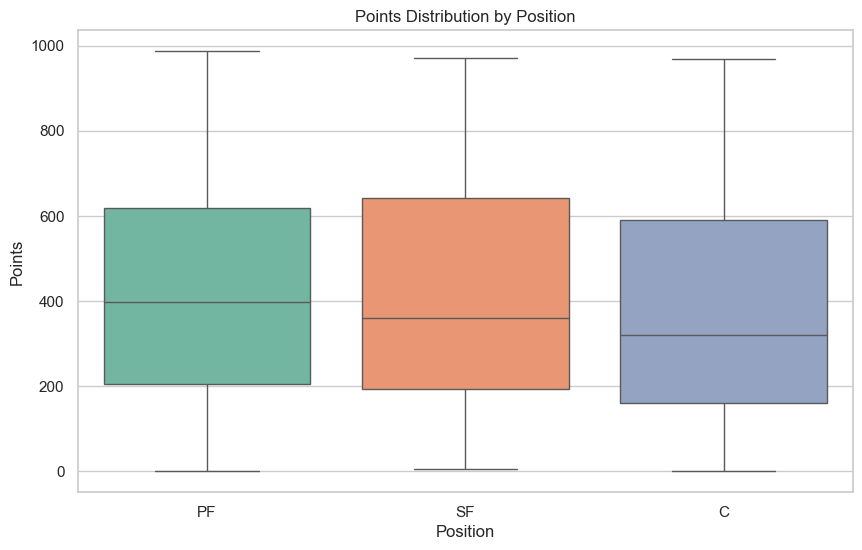

In [122]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=box_df,
    x='Pos',
    y='PTS',
   
    hue='Pos',          # Assigning hue to match x
    palette='Set2',
    legend=False        # We don’t need a duplicate legend
)
plt.title('Points Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Points')
plt.show()


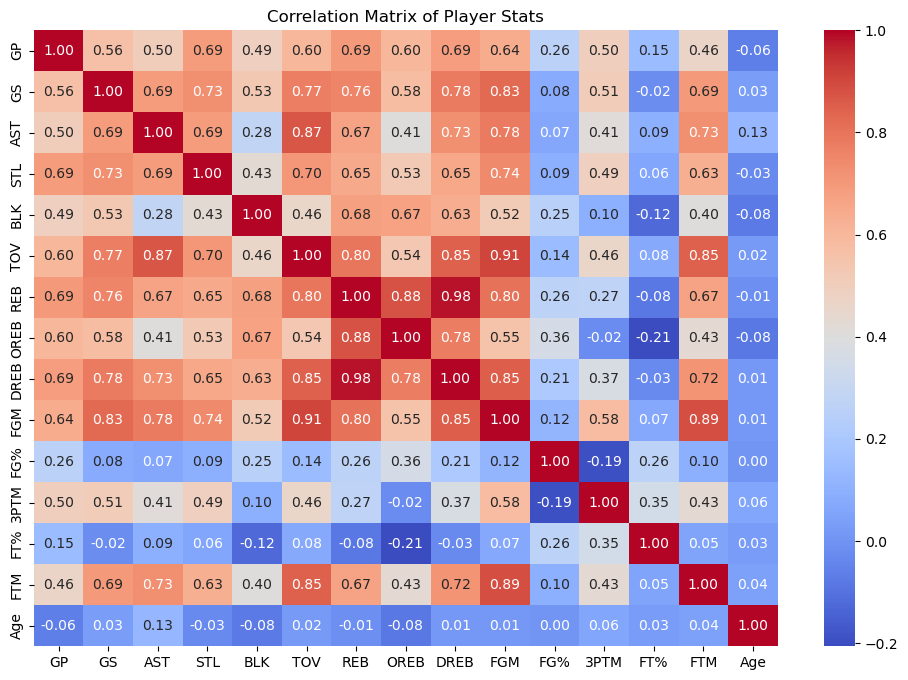

In [104]:
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Player Stats')
plt.show()

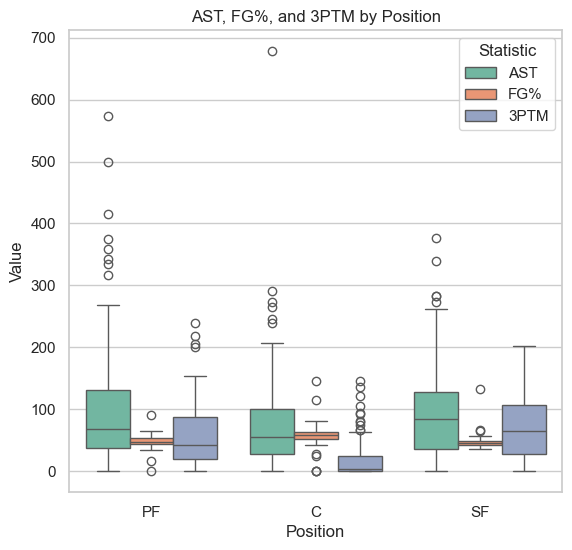

In [106]:
# Select relevant columns and drop rows with missing values
cols1 = ['Pos', 'AST', 'FG%', '3PTM']
cols2 = ['Pos', 'REB', 'BLK', 'FT%']
df1 = df[cols1].dropna()
df2 = df[cols2].dropna()

# Set up the visual style
sns.set(style="whitegrid")

# Create first visualization: AST, FG%, and 3PTM by Position
plt.figure(figsize=(14, 6))
df1_melted = df1.melt(id_vars='Pos', var_name='Stat', value_name='Value')
plt.subplot(1, 2, 1)
sns.boxplot(data=df1_melted, x='Pos', y='Value', hue='Stat', palette='Set2')
plt.title('AST, FG%, and 3PTM by Position')
plt.xlabel('Position')
plt.ylabel('Value')
plt.legend(title='Statistic')

In [ ]:
# Select relevant columns and drop rows with missing values
cols1 = ['Pos', 'AST', 'FG%', '3PTM']
df1 = df[cols1].dropna()
df2 = df[cols2].dropna()

# Set up the visual style
sns.set(style="whitegrid")

# Create first visualization: AST, FG%, and 3PTM by Position
plt.figure(figsize=(14, 6))
df1_melted = df1.melt(id_vars='Pos', var_name='Stat', value_name='Value')
plt.subplot(1, 2, 1)
sns.boxplot(data=df1_melted, x='Pos', y='Value', hue='Stat', palette='Set2')
plt.title('AST, FG%, and 3PTM by Position')
plt.xlabel('Position')
plt.ylabel('Value')
plt.legend(title='Statistic')

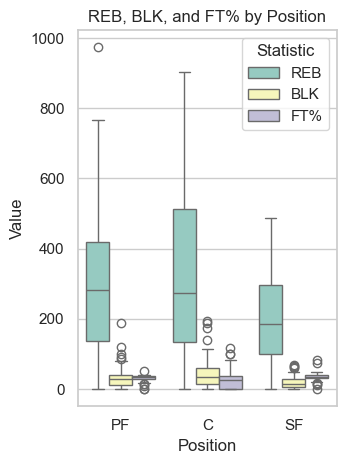

In [108]:
# Create second visualization: REB, BLK, and FT% by Position
df2_melted = df2.melt(id_vars='Pos', var_name='Stat', value_name='Value')
plt.subplot(1, 2, 2)
sns.boxplot(data=df2_melted, x='Pos', y='Value', hue='Stat', palette='Set3')
plt.title('REB, BLK, and FT% by Position')
plt.xlabel('Position')
plt.ylabel('Value')
plt.legend(title='Statistic')

plt.tight_layout()
plt.show()

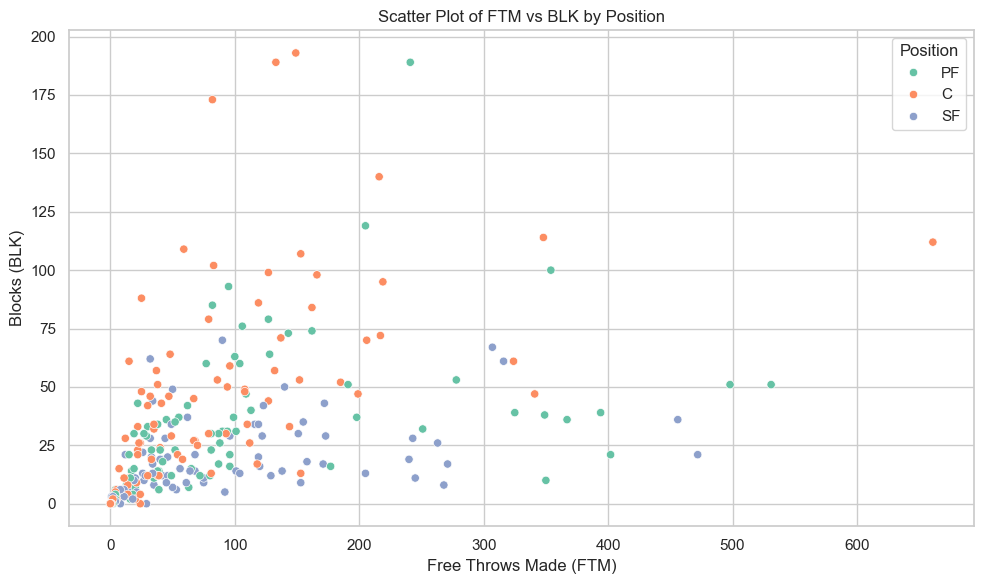

In [110]:
# Set up the scatter plot with BLK on the Y-axis and FTM on the X-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='FTM', y='BLK', hue='Pos', palette='Set2')

# Customize the plot
plt.title('Scatter Plot of FTM vs BLK by Position')
plt.xlabel('Free Throws Made (FTM)')
plt.ylabel('Blocks (BLK)')
plt.legend(title='Position')
plt.grid(True)
plt.tight_layout()
plt.show()

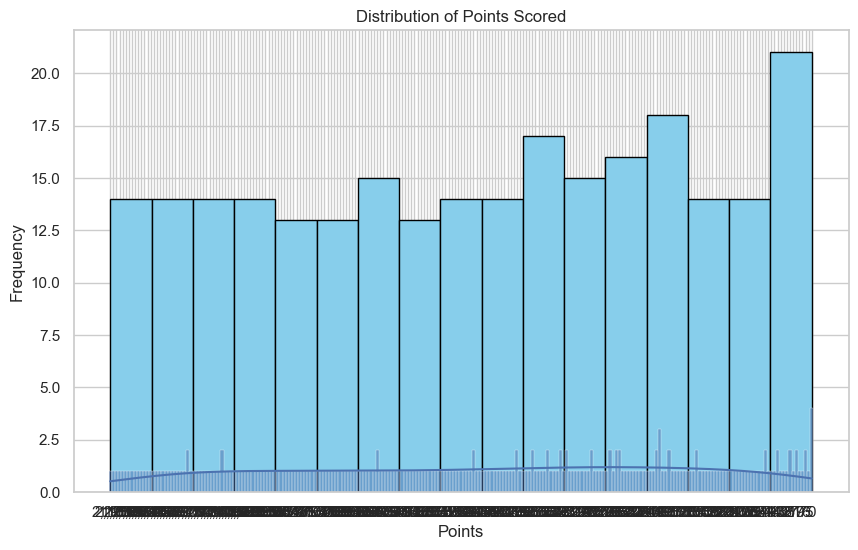

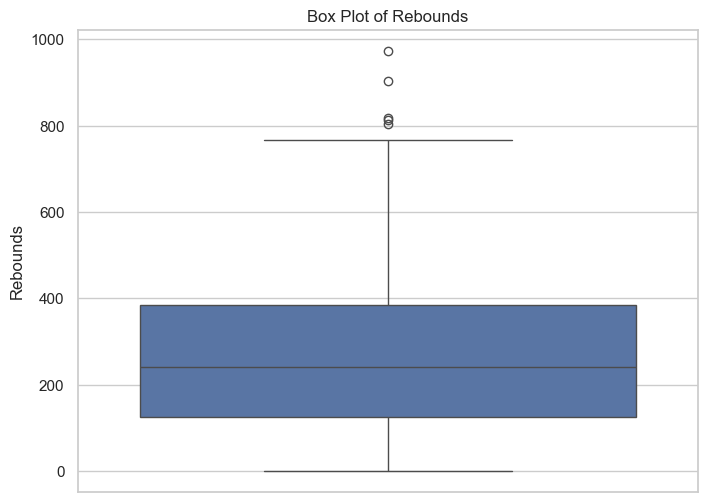

In [146]:
# --- Univariate Visualizations ---
plt.figure(figsize=(10, 6))
plt.hist(df['PTS'],bins=17, color='skyblue',edgecolor='black')
sns.histplot(df['PTS'], kde=True)
plt.title('Distribution of Points Scored')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['REB'])
plt.title('Box Plot of Rebounds')
plt.ylabel('Rebounds')
plt.show()